# **Economic Growth and Life Expectancy**

<br>
This project aims to analyse the relationship between a country's Gross Domestic Product (GDP)  and the life expectancy of its population from 1980 to 2019. Economic growth is often measured by GDP, making it a crucial factor in understanding how it affects the longevity of human life.


## **Table of Contents**

1. <a href ='#Introduction'>Introduction</a>
2. <a href ='#Data_Sources'>Data Sources</a>
3. <a href ='#Data_Inspection_and_Cleaning'>Data Inspection and Cleaning</a>
4. <a href ='#Data_Preparation_for_Analysis'>Data Preparation for Analysis</a>
5. <a href='#Data_Analysis'>Data Analysis</a>
6. <a href='#Conclusions'>Conclusions</a>
7. <a href='#Future_Analysis'>Future Analysis</a>
8. <a href='#References'>References</a>

<a id ='Introduction'></a>
## **1.Introduction**
<br>
According to the estimates of the World Health Organisation, life expectancy has increased by more than 6 years between 2000 and 2019 - from 66.8 years in 2000 to 73.4 years in 2019. In 1950, life expectancy in developing countries was 40 years (Word Bank,1993). Comparing current statistics to data from previous decades, human life expectancy have been improved substantially. Longer life expectancy is usually associated with ease of access to medical services, better technological advancements, higher standard of living, all of which contribute to improved well-being of individuals.
These factors are often linked with a country's Gross Domestic Product, as it reflects the country's economic development and its ability to sustain the population's health through providing the appropriate healthcare infrastructure and a sustainable healthcare system.
<br>

This project looks into the GDP data and life expectancy data from Our World in Data to examine the relationship between GDP and life expectancy.
<br>

To my understanding, economic growth has always been a driving factor for longer average life expectancy among individuals within a country.Yet the impact of a country's GDP towards its population's life expectancy remains unclear to me, this poses a valuable opportunity to investigate into the topic.

**Research questions**


1. How has global GDP / GDP per capita changed over the past few decades? 

2. How has Life expectancy changed over the past few decades?

3. How does GDP correlate with life expectancy? Does higher GDP mean higher life expetancy?

4. How does GDP per capita correlate with life expectancy? Does higher GDP per capita mean higher life expetancy?


5. How do different regions compare in terms of life expectancy correlation? Are there any regional patterns?

6. Does average life expectancy stagnate when certain GDP per capita is reached?



<a id ='Data_Sources'></a>
## **2. Data Sources**

Below are the list of data sets used in the project:
* life-expectancy.csv: Life expectancy, 1770 - 2021, available at
https://ourworldindata.org/grapher/life-expectancy
(Our World in Data).
* national-gdp-wb.csv: Gross domestic product (GDP), 1990 - 2021, available at https://ourworldindata.org/grapher/national-gdp-wb?tab=chart (Our World in Data).
* population-and-demography.csv: Population, 1950 -2020, available at https://ourworldindata.org/population-growth#explore-data-poverty (Our World in Data).





<a id ='Data_Inspection_and_Cleaning'></a>
## **3. Data Inspection and Cleaning**



In [15]:
#Installing neccessary modules 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
#Importing data from data sources
df_life_expectancy = pd.read_csv('life-expectancy.csv')
df_gdp = pd.read_csv('national-gdp-wb.csv')
df_population = pd.read_csv('population-and-demography.csv')



**life-expectancy.csv**

The csv file contains 4 columns:
<br>



1. Entity:
<br>
This column contains the name of the country or the name of the continent or specific groups like low income countries, high income countries.

2. Code:
<br> 
This column contains a 3 letter alphabet code representing a country, while regions and specific groups remains empty.

3. Year:
<br>
This column contains the 4 digit numerical value representing a year.

4. Life expectancy at birth (historical):
<br>
This column contains the average life expectancy round to one decimal place.


In [18]:
#print life expectancy data frame
print(df_life_expectancy.shape)

#Create life expectancy data frame with countries only and filtering out unnecessary data
df_life_expectancy_countries_only = df_life_expectancy[(df_life_expectancy['Code'].notna())]
df_life_expectancy_countries_only = df_life_expectancy_countries_only[(~df_life_expectancy['Code'].isin(['OWID_KOS','OWID_WRL']))]


#Rename life expectancy countries only data frame column names
df_life_expectancy_countries_only.columns = ['country_name','country_code','year','life_expectancy']

#Reset index labels 
df_life_expectancy_countries_only = df_life_expectancy_countries_only.reset_index(drop=True)

#Create life expectancy data frame with continents only and create a list of continents for filtering

continents =['Africa','Northern America','Latin America and the Caribbean','Asia','Europe','Oceania']

df_life_expectancy_regions_only = df_life_expectancy[df_life_expectancy['Entity'].isin(continents)]

#Rename life expectany regions only data frame column names
df_life_expectancy_regions_only.columns = ['region_name','country_code','year','life_expectancy']

#Reset index labels
df_life_expectancy_regions_only = df_life_expectancy_regions_only.reset_index(drop=True)

#Check data frame
df_life_expectancy.shape

print(df_life_expectancy_countries_only)

print(df_life_expectancy_regions_only)




(20449, 4)
      country_name country_code  year  life_expectancy
0      Afghanistan          AFG  1950             27.7
1      Afghanistan          AFG  1951             28.0
2      Afghanistan          AFG  1952             28.4
3      Afghanistan          AFG  1953             28.9
4      Afghanistan          AFG  1954             29.2
...            ...          ...   ...              ...
18975     Zimbabwe          ZWE  2017             60.7
18976     Zimbabwe          ZWE  2018             61.4
18977     Zimbabwe          ZWE  2019             61.3
18978     Zimbabwe          ZWE  2020             61.1
18979     Zimbabwe          ZWE  2021             59.3

[18980 rows x 4 columns]
    region_name country_code  year  life_expectancy
0        Africa          NaN  1770             26.4
1        Africa          NaN  1925             26.4
2        Africa          NaN  1950             37.6
3        Africa          NaN  1951             37.9
4        Africa          NaN  1952         

/tmp/ipykernel_30/545756416.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_life_expectancy_countries_only = df_life_expectancy_countries_only[(~df_life_expectancy['Code'].isin(['OWID_KOS','OWID_WRL']))]


**national-gdp-wb.csv**

The csv file contains 4 columns:

Entity:
<br>
This column contains the name of the country or the name of the continent or specific groups like low income countries, high income countries.

Code:
<br>
This column contains a 3 letter alphabet code representing a country, while regions and specific groups remains empty.

Year:
<br>
This column contains the 4 digit numerical value representing a year.

GDP,ppp(constant 2017 international $):
<br>
This column contains the GDP measured in US dollars.



In [19]:
#print GDP data shape
print(df_gdp.shape)

#create GDP data frame with countries only filtering out unnecessary data
df_gdp_countries_only = df_gdp[df_gdp['Code'].notna()]
df_gdp_countries_only = df_gdp_countries_only[(~df_gdp['Code'].isin(['OWID_KOS','OWID_WRL']))]

#Rename GDP countries only data frame column names
df_gdp_countries_only.columns = ['country_name','country_code','year','GDP']

#Reset index labels 
df_gdp_countries_only = df_gdp_countries_only.reset_index(drop=True)

#create GDP data frame with continents only and create a list of continents for filtering
continents =['Sub-Saharan Africa (WB)','North America (WB)','Latin America and Caribbean (WB)','East Asia and Pacific (WB)','European Union (27)','South Asia (WB)']

df_gdp_regions_only = df_gdp[df_gdp['Entity'].isin(continents)]

#Rename GDP countries only data frame column names
df_gdp_regions_only.columns = ['region_name','country_code','year','GDP']

#Reset index labels 
df_gdp_regions_only = df_gdp_regions_only.reset_index(drop=True)

print(df_gdp_countries_only)
print(df_gdp_regions_only)

(6346, 4)
     country_name country_code  year          GDP
0     Afghanistan          AFG  2002  26890054000
1     Afghanistan          AFG  2003  29265058000
2     Afghanistan          AFG  2004  29678901000
3     Afghanistan          AFG  2005  33011757000
4     Afghanistan          AFG  2006  34780330000
...           ...          ...   ...          ...
5851     Zimbabwe          ZWE  2017  34396336000
5852     Zimbabwe          ZWE  2018  36119544000
5853     Zimbabwe          ZWE  2019  33832294000
5854     Zimbabwe          ZWE  2020  31187640000
5855     Zimbabwe          ZWE  2021  33828616000

[5856 rows x 4 columns]
                    region_name country_code  year             GDP
0    East Asia and Pacific (WB)          NaN  1990   9382427000000
1    East Asia and Pacific (WB)          NaN  1991   9893428000000
2    East Asia and Pacific (WB)          NaN  1992  10403365000000
3    East Asia and Pacific (WB)          NaN  1993  10935821000000
4    East Asia and Pacific (WB

/tmp/ipykernel_30/1744190630.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_gdp_countries_only = df_gdp_countries_only[(~df_gdp['Code'].isin(['OWID_KOS','OWID_WRL']))]


**population-and-demography.csv**
The csv file contains 24 columns:

1. Country name:
<br>
This column contains the name of the country.
2. Year:
<br>
This column contains the 4 digit numerical value representing a year.
3. Population:
<br>
This column contains the population number.
4. The remaining columns (column 4 - 24):
<br>
The columns contain the population number of different age groups.

In [20]:
#dropping unnecessary columns for population data frame and renaming columns
df_population = df_population[['Country name','Year','Population']]
df_population.columns = ['country_name','year','population']

print(df_population)


      country_name  year  population
0      Afghanistan  1950     7480464
1      Afghanistan  1951     7571542
2      Afghanistan  1952     7667534
3      Afghanistan  1953     7764549
4      Afghanistan  1954     7864289
...            ...   ...         ...
18283     Zimbabwe  2017    14751101
18284     Zimbabwe  2018    15052191
18285     Zimbabwe  2019    15354606
18286     Zimbabwe  2020    15669663
18287     Zimbabwe  2021    15993525

[18288 rows x 3 columns]


**Cleaned data**
<br>

The data in the life-expectancy.csv and national-gdp-wb.csv file share the same format, the entity column contains values like regions, income groups and countries. Every Country have a Country code, whereas regions and income groups do not. As a result, a data frame is created with countries only or regions only. 
<br>

The national-gdp-wb.csv was handled differently as it has a different format, only the first 3 columns are kept and the other columns are removed from the data frame.

<a id ='Data_Preparation_for_Analysis'></a>
## **4. Data Preparation for Analysis**

The data required for this project's analysis was spread across 3 different csv files. After cleaning the data, data will be merged in this stage. Given the time frame that this project is focused on is from 1980 to 2019, irrelevant data will be excluded through filtering.

In [21]:
# filtering the year for the data frames (1980 -2019)
df_gdp_countries_only = df_gdp_countries_only[(df_gdp_countries_only['year'] >= 1980) & (df_gdp_countries_only['year'] <= 2019)]

df_gdp_regions_only = df_gdp_regions_only[(df_gdp_regions_only['year'] >= 1980) & (df_gdp_regions_only['year'] <= 2019)]

df_life_expectancy_countries_only = df_life_expectancy_countries_only[(df_life_expectancy_countries_only['year'] >= 1980) & (df_life_expectancy_countries_only['year'] <= 2019)]

df_life_expectancy_regions_only = df_life_expectancy_regions_only[(df_life_expectancy_regions_only['year']>=1980) & (df_life_expectancy_regions_only['year']<=2019)]

df_population = df_population[(df_population['year'] >= 1980) & (df_population['year'] <= 2019)]


#creating a unique id for joining the data

df_gdp_countries_only['uid'] = df_gdp_countries_only['country_name'].astype(str)+'_'+ df_gdp_countries_only['year'].astype(str)

df_gdp_regions_only['uid'] = df_gdp_regions_only['region_name'].astype(str)+'_'+df_gdp_regions_only['year'].astype(str)

df_life_expectancy_countries_only['uid'] = df_life_expectancy_countries_only['country_name'].astype(str)+'_'+ df_life_expectancy_countries_only['year'].astype(str)

df_life_expectancy_regions_only['uid'] = df_life_expectancy_regions_only['region_name'].astype(str)+'_'+ df_life_expectancy_regions_only['year'].astype(str)

df_population['uid'] = df_population['country_name'].astype(str)+'_'+df_population['year'].astype(str)

#joining the gdp and life expectancy data frames for countries only
df_gdp_life_expectancy_countries_only = pd.merge(df_gdp_countries_only,df_life_expectancy_countries_only, on='uid',how = 'left')

#dropping duplicated columns
df_gdp_life_expectancy_countries_only = df_gdp_life_expectancy_countries_only.drop(['country_name_y','country_code_y','year_y'],axis=1)

#joining the gdp and life expectancy merged data frame with the population data frame
df_gdp_life_expectancy_population_countries_only = pd.merge(df_gdp_life_expectancy_countries_only,df_population,on='uid',how = 'left')

#dropping duplicated columns
df_gdp_life_expectancy_population_countries_only = df_gdp_life_expectancy_population_countries_only.drop(['country_name','year'],axis=1)


#renaming the columns
df_gdp_life_expectancy_population_countries_only.columns = ['country_name','country_code','year','GDP','uid','life_expectancy','population']

df_gdp_life_expectancy_population_countries_only

#create column for GDP per capita
df_gdp_life_expectancy_population_countries_only['GDP_per_capita'] = df_gdp_life_expectancy_population_countries_only['GDP'] / df_gdp_life_expectancy_population_countries_only['population']

df_gdp_life_expectancy_population_countries_only


,country_name,country_code,year,GDP,uid,life_expectancy,population,GDP_per_capita
0,Afghanistan,AFG,2002,26890054000,Afghanistan_2002,56.5,21000258,1280.463031
1,Afghanistan,AFG,2003,29265058000,Afghanistan_2003,57.3,22645136,1292.333064
2,Afghanistan,AFG,2004,29678901000,Afghanistan_2004,57.9,23553554,1260.060414
3,Afghanistan,AFG,2005,33011757000,Afghanistan_2005,58.4,24411196,1352.320345
4,Afghanistan,AFG,2006,34780330000,Afghanistan_2006,58.7,25442946,1366.993036
...,...,...,...,...,...,...,...,...
5473,Zimbabwe,ZWE,2015,32752806000,Zimbabwe_2015,59.6,14154937,2313.878614
5474,Zimbabwe,ZWE,2016,33047894000,Zimbabwe_2016,60.3,14452705,2286.623438
5475,Zimbabwe,ZWE,2017,34396336000,Zimbabwe_2017,60.7,14751101,2331.780929
5476,Zimbabwe,ZWE,2018,36119544000,Zimbabwe_2018,61.4,15052191,2399.620361


<a id='Data_Analysis'></a>
## **5. Data Analysis**

In the section, we will be trying to answer the research questions by using the cleaned and prepared data.
<br>

**1. How has global GDP / GDP per capita changed over the past few decades?**

<br>
We will plot GDP and GDP per capita against year from 1990 to 2019 to observe the GDP trend of all countries within the time frame.

Text(0.5, 1.0, 'All countries GDP trend from 1990 to 2019')

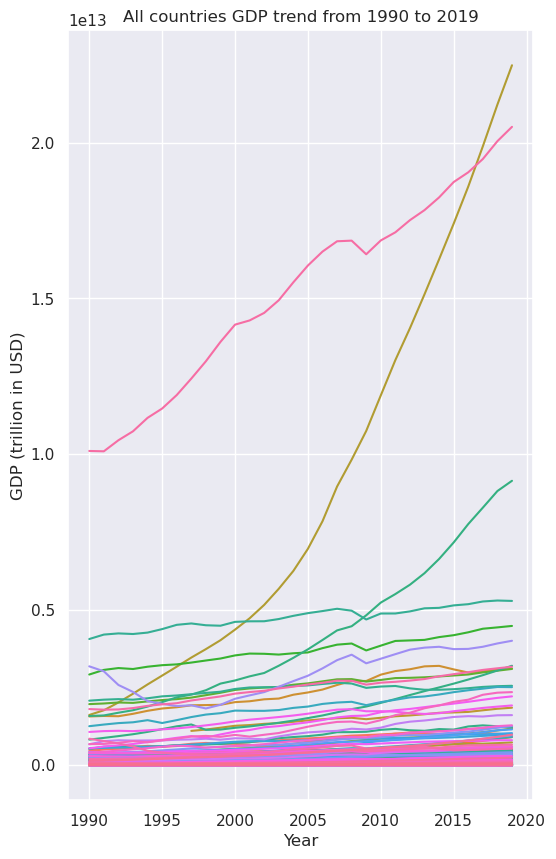

In [22]:
#plotting GDP against year for different countries
sns.set()
plt.figure(figsize=[6,10])
gdp_vs_year = sns.lineplot(
    data= df_gdp_life_expectancy_population_countries_only,
    x='year',
    y='GDP',
    hue='country_name',
    legend = False
    
    )
gdp_vs_year.set_xlabel('Year')
gdp_vs_year.set_ylabel('GDP (trillion in USD)')
plt.title('All countries GDP trend from 1990 to 2019')


Text(0.5, 1.0, 'All countries GDP per capita trend from 1990 to 2019')

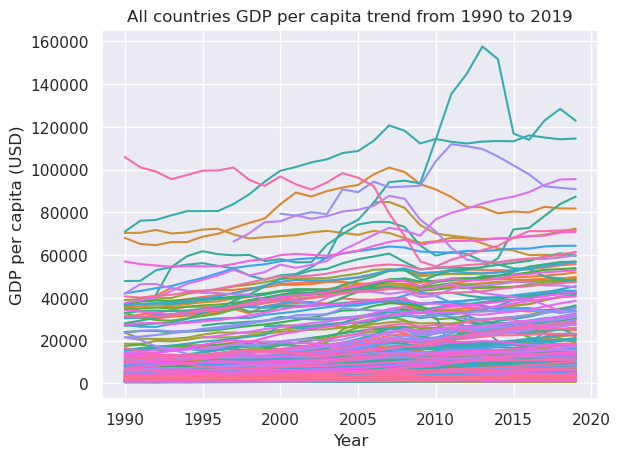

In [9]:
#plotting GDP per capita against year
gdp_per_capita_vs_year = sns.lineplot(
    data = df_gdp_life_expectancy_population_countries_only,
    x = 'year',
    y = 'GDP_per_capita',
    hue = 'country_name',
    legend = False
)

gdp_per_capita_vs_year.set_xlabel('Year')
gdp_per_capita_vs_year.set_ylabel('GDP per capita (USD)')
plt.title('All countries GDP per capita trend from 1990 to 2019')

**Observation**:
<br>
GDP and GDP per capita for all countries mostly showed an uptrend throughout 1990 to 2019. Both graphs suggests that global economies are in  expasion, while some countries outperformed others, the general trend consistently pointed upwards. 

**2.How has Life expectancy changed over the past few decades?**

We will plot life expectancy against year for all countries to observe the change in life expectancy changes throughout the 1990 - 2019 time frame.

Text(0.5, 1.0, 'All countries life expectancy from 1990 to 2019')

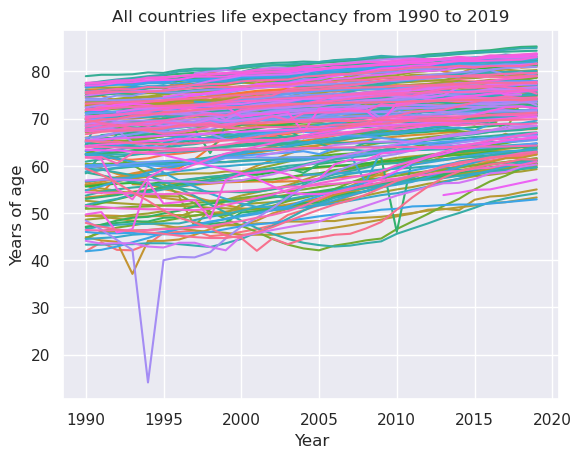

In [10]:
#plotting life expectancy against year

life_expectancy_vs_year = sns.lineplot(
    data = df_gdp_life_expectancy_population_countries_only,
    x = 'year',
    y = 'life_expectancy',
    hue = 'country_name',
    legend = False
)
life_expectancy_vs_year.set_xlabel('Year')
life_expectancy_vs_year.set_ylabel('Years of age')
plt.title ('All countries life expectancy from 1990 to 2019')


**Observation:**
<br>
Life expectancy of individuals across all countries has showed a noticeable uptred. While in some countries, the increase in life expectancy start to flatten near the 80-years old mark, some countries experienced a substantial growth in life expectancy throughout the same time period. 

**3.How does GDP correlate with life expectancy? Does higher GDP mean higher life expetancy?**
<br>

We will try to use facet grids of scatter plots to see how GDP correlates with life expectancy. Since there are too much data to look at, it would be hard to draw conclusions. Consequently, we will conduct the analysis by focusing on random countries drawn from different income groups defined by the world bank.
<br>

**Low income economies:**
<br>

* Afghanistan
* Liberia
* Somalia
* Ethiopia

**Lower-middle income economies**
<br>

* Ghana
* India
* Zimbabwe
* Cameroon

**Upper-middle income economies**

* Brazil
* China
* Indonesia
* South Africa


**High income economies**

* Australia
* United States
* Japan
* Germany




/usr/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


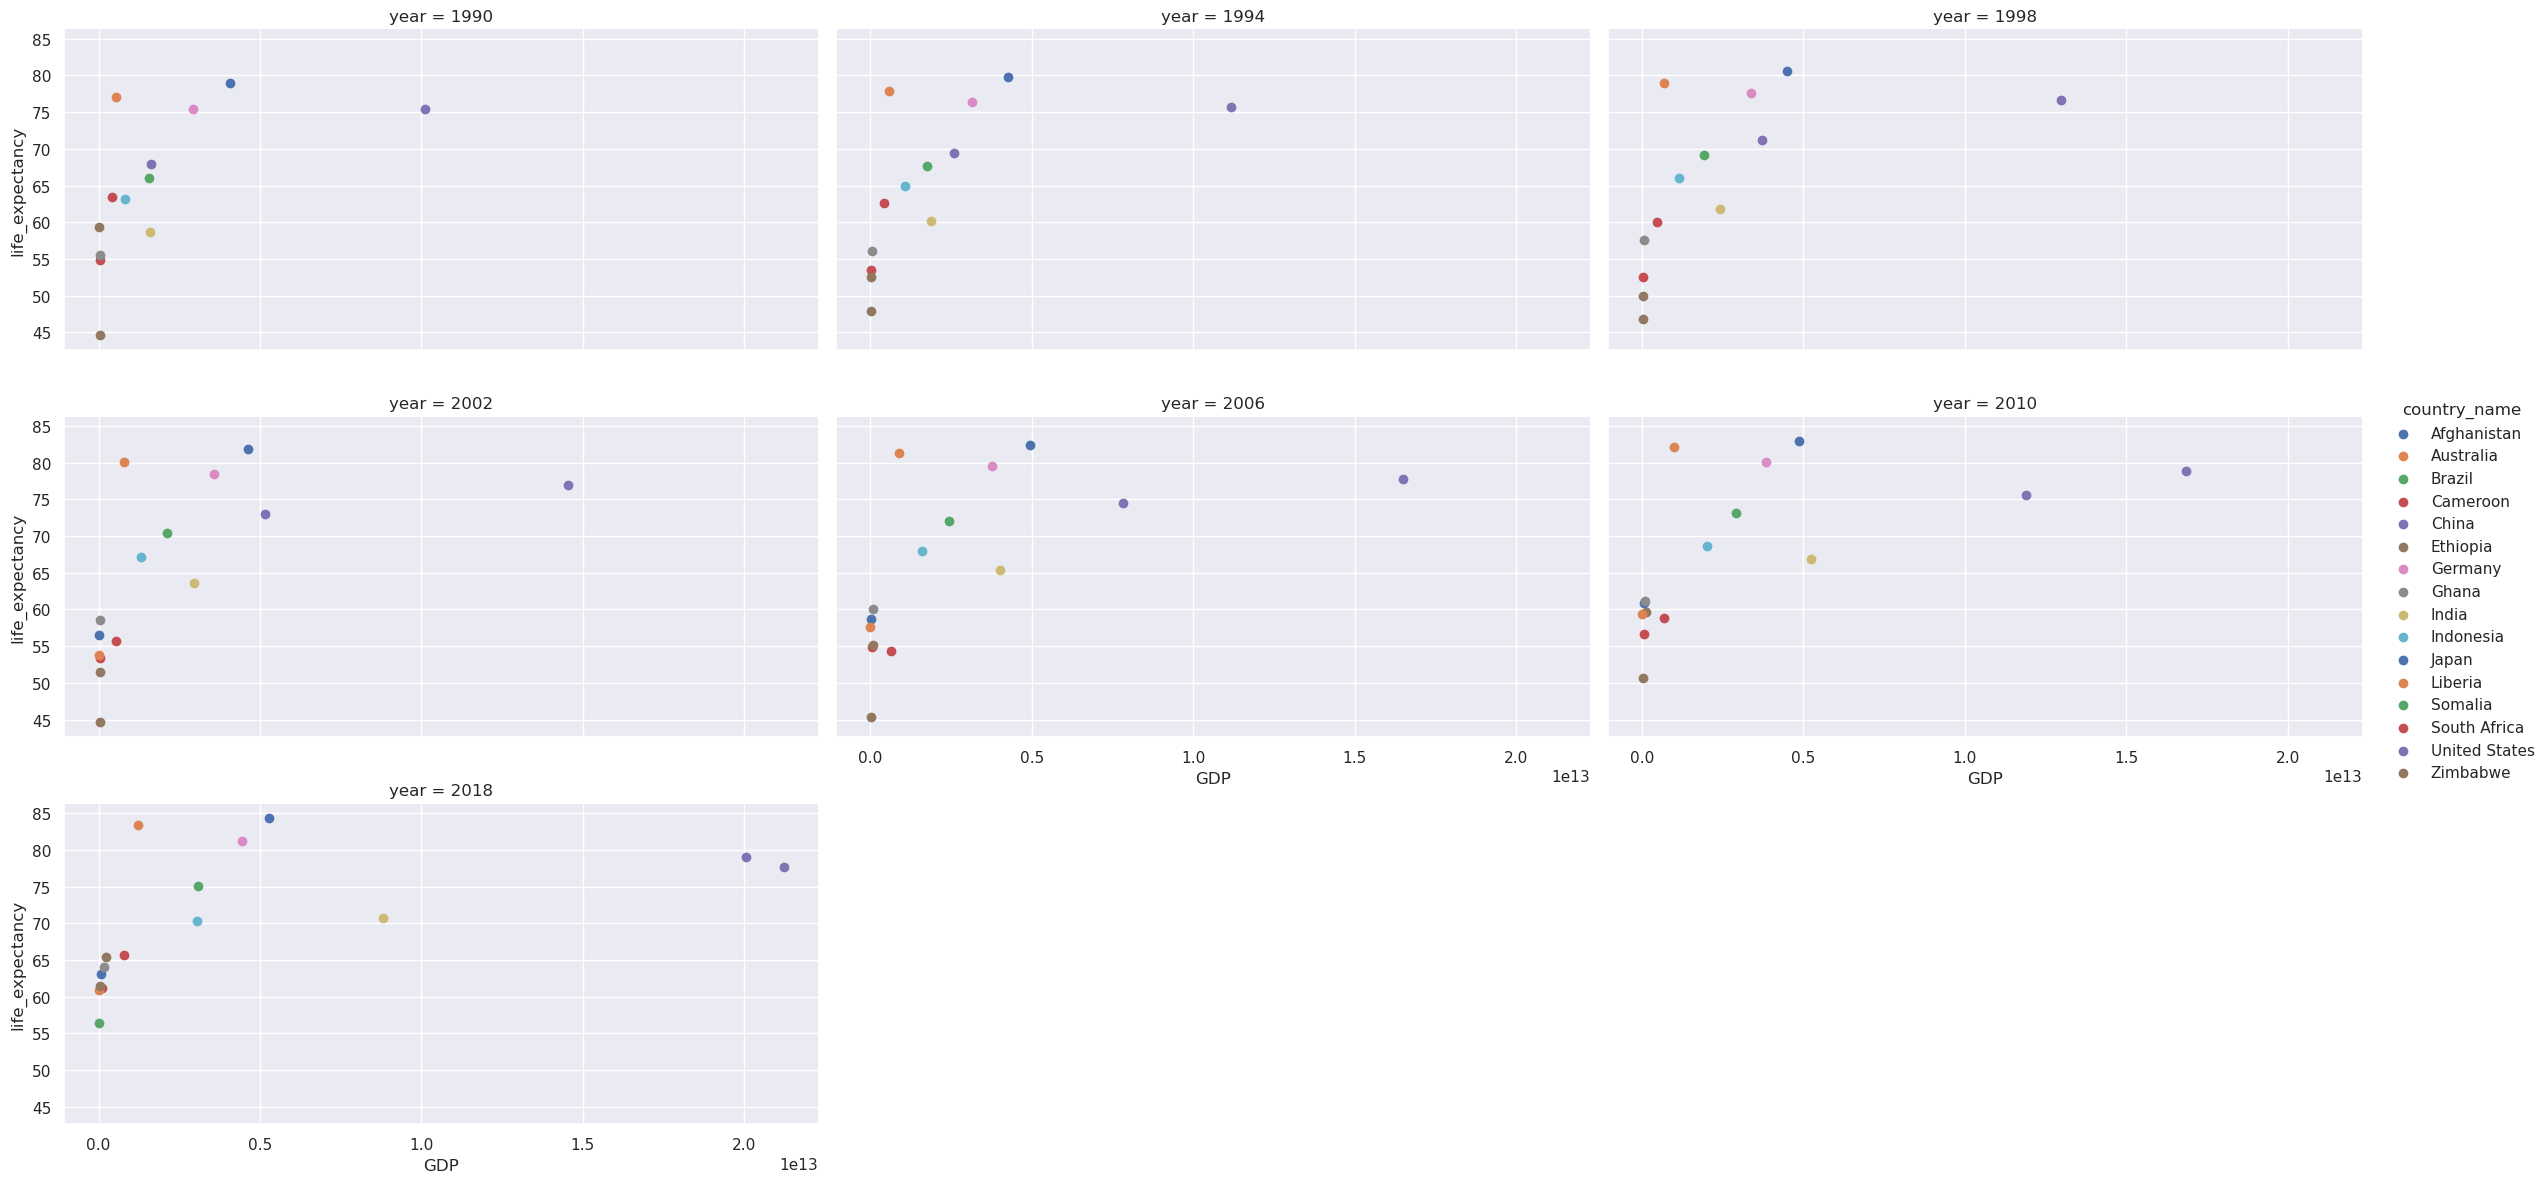

In [11]:
#create data frame for focus countries
df_focus_countries = df_gdp_life_expectancy_population_countries_only[df_gdp_life_expectancy_population_countries_only['country_name'].isin(['Afghanistan','Liberia','Somalia','Ethiopia','Ghana','India','Zimbabwe','Cameroon','Brazil','China','Indonesia','South Africa','Australia','United States','Japan','Germany'])]
df_focus_countries = df_focus_countries[df_focus_countries['year'].isin([1990,1994,1998,2002,2006,2010,2018])]

#plot facet grid scatter plot 
f_grid = sns.FacetGrid(
    data = df_focus_countries,
    col = 'year',
    hue = 'country_name',
    col_wrap = 3,
    height = 4,
    aspect =2,
    palette ='deep'

)
f_grid =(f_grid.map(plt.scatter,'GDP','life_expectancy').add_legend())
plt.show()


**Observation:**
<br>
GDP and life expectancy showed an positive relationship, as GDP increases, life expectancy in that country also increases. Countries like the United States, Japan, Indonesia and China showed substantial life expectancy growth while rapidly growing their GDP. 

**4.How does GDP per capita correlate with life expectancy? Does higher GDP per capita mean higher life expetancy?**
<br>

This question is similar to the previous one but the data used will be GDP per capita instead of GDP.

/usr/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


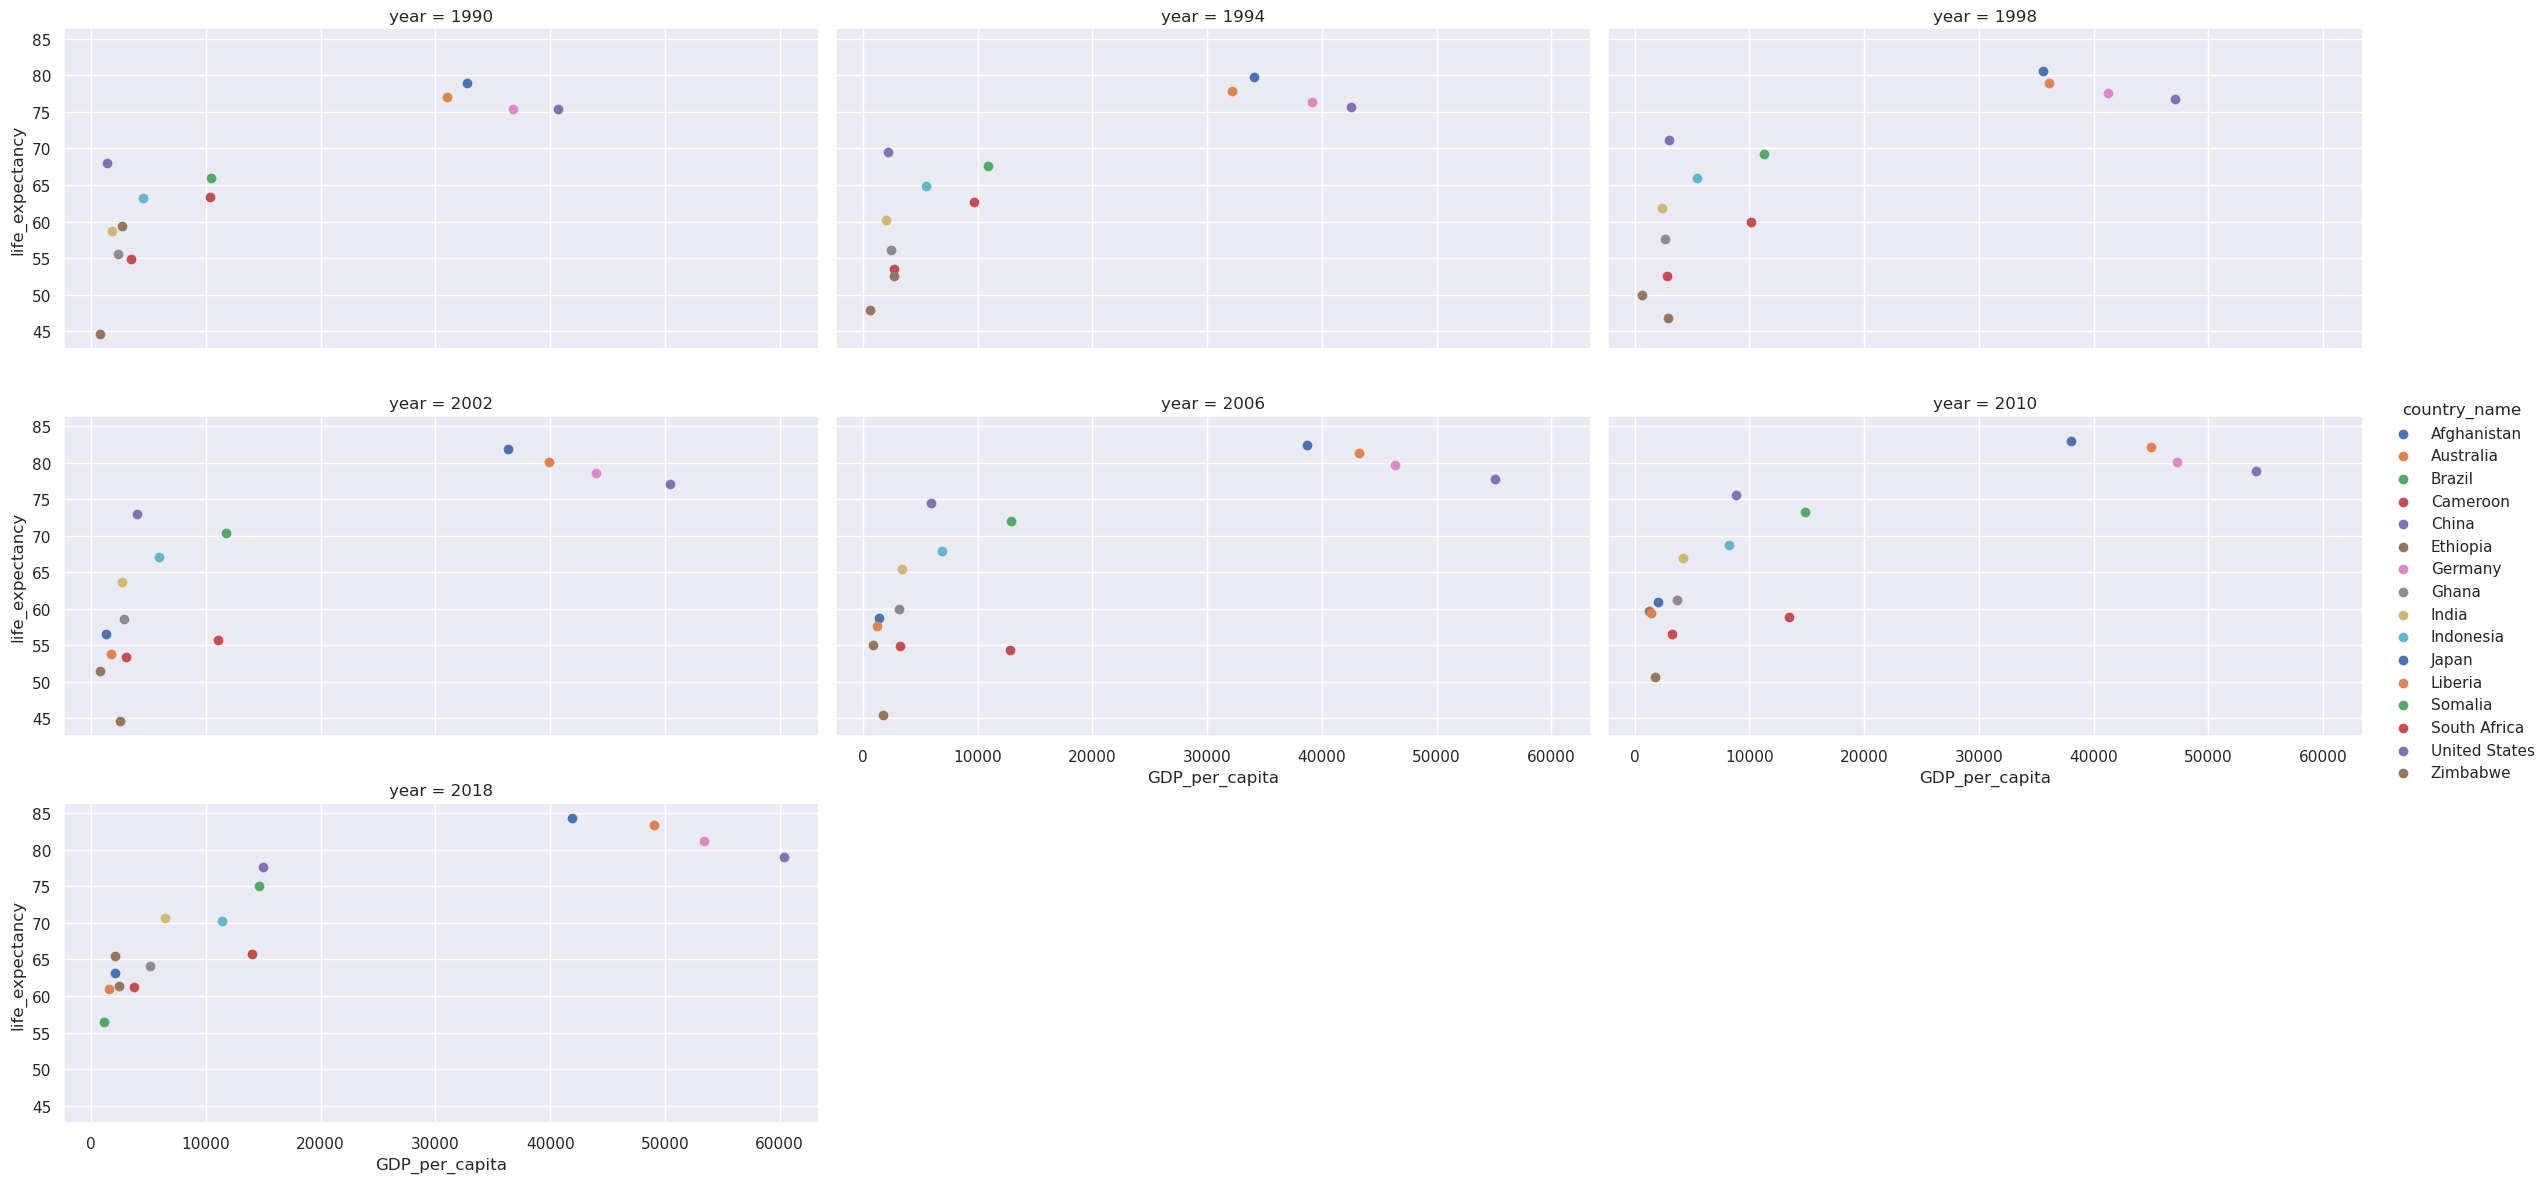

In [12]:
#plot facet grid scatter plot with GDP per capita and life expectancy
f_grid = sns.FacetGrid(
    data = df_focus_countries,
    col = 'year',
    hue = 'country_name',
    col_wrap = 3,
    height = 4,
    aspect =2,
    palette ='deep'

)
f_grid =(f_grid.map(plt.scatter,'GDP_per_capita','life_expectancy').add_legend())

**Observation:**
<br>
Compared with GDP, the relationship between GDP per capita and life expectancy showed a stronger correlation. Most countries that exprienced growth showed obvious growth in life expectancy.The observation may suggest economic growth on a national scale might not have as significant of an impact towards individual's life expectancy as economic growth on a personal level.

**5.How do different regions compare in terms of life expectancy ? Are there any regional patterns?**
<br>

We will look at the data and see if thres is a regional pattern on GDP and life expectancy.



/tmp/ipykernel_30/1477332735.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gp.datasets.get_path('naturalearth_lowres')
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory


Text(0.5, 1.0, 'Life expectancy by country')

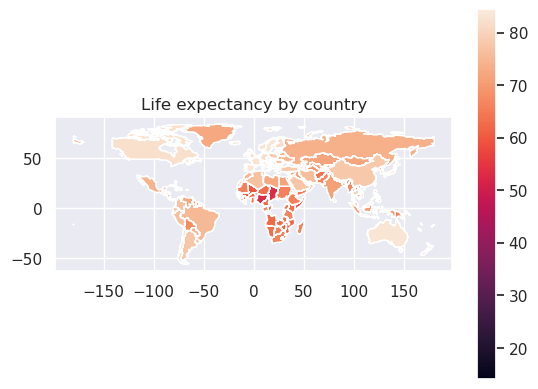

In [13]:
#plot a map plot on life expectancy
#import geo pandas for map plot
import geopandas as gp
world = gp.read_file(
    gp.datasets.get_path('naturalearth_lowres')
)

#merging life expectancy data with map data
world = world.merge(
    df_life_expectancy_countries_only,
   left_on = 'name',
   right_on = 'country_name',
   how = 'left',
)

world.plot(
    column = 'life_expectancy',
    legend = True,
   
)
plt.title('Life expectancy by country')


**Observation:**
<br>
The life expectancy average was highest in regions like Europe, North America, Oceania, where the more developed countries are located. This was followed by Asia, South America  and Africa, where middle and low income countries are located.

**6.Does average life expectancy stagnate when certain GDP per capita is reached?**

<br>
We will try to investigate the if life expectancystarts to stagnate after a certain gdp per capita is reached by using regression models. 

Text(0.5, 1.0, 'Life expectancy vs GDP per capita regression model')

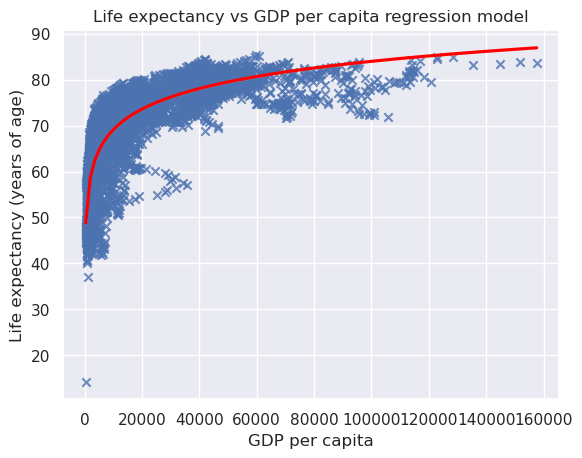

In [14]:
#plot a regression plot
reg_plot = sns.regplot(
    data = df_gdp_life_expectancy_population_countries_only,
    x = 'GDP_per_capita',
    y='life_expectancy',
    marker = 'x',
    line_kws = {'color':'red'},
    logx = True

)
reg_plot.set_ylabel('Life expectancy (years of age)')
reg_plot.set_xlabel('GDP per capita')
plt.title('Life expectancy vs GDP per capita regression model')

**Observation:**
<br>
The impact of GDP per capita towards life expectancy starts to plateau around USD 60,000. Once individuals' annual income reach USD 60,000, the influence of wealthh towards individuals' life expectancy appears to level off.

<a id='Conclusions'></a>
## **6.Conclusions**
<br>

The overall observations support the positive correlation between economic growth and life expectancy.This correlation could be explained by having a better standard of living and ease of access towards healthcare which are closely associated with economic growth of a country. However, when an individual's annual income reaches around USD 60,000, the positive influence that economic factor contributes towards a longer living life starts to diminish.



<a id='Future_Analysis'></a>
## **7. Future Analysis**
There are certain constraints in this analysis, while GDP and GDP per capita of countries are easily measured, the factor of income inequality within countries is absent from this analysis.This factor may potentially be pivotal in shaping the final outcome. Other than the factor of  income inequality, more intangible factors like quality of healthcare, cultural practices and public policies may also play a crucial part in economic growth and life expectancy. These factors could be covered in future analysis to have a more hollisitc view on the correlation between economic growth and life expectancy.



<a id='References'></a>
## **8.References**
 

* Ghe: Life expectancy and healthy life expectancy (no date) World Health Organization. Available at: https://www.who.int/data/gho/data/themes/mortality-and-global-health-estimates/ghe-life-expectancy-and-healthy-life-expectancy (Accessed: 14 August 2023).

* Publication: World Development Report 1993: Investing in Health (no date) Open Knowledge Repository . Available at: https://openknowledge.worldbank.org/entities/publication/cfc6265c-8fc7-51c8-b032-d718364ff139 (Accessed: 14 August 2023). 

* World Bank Country and lending groups (no date) World Bank Country and Lending Groups – World Bank Data Help Desk. Available at: https://datahelpdesk.worldbank.org/knowledgebase/articles/906519 (Accessed: 14 August 2023). 





